In [14]:
import pandas as pd
import os

# API Wrappers

## Dealing with `keys` in code

Usually, when you access an API, you'll use some password or `key`. 

There's a package called `dotenv` that helps you hide your keys inside a file.

- Install dotenv `!pip install dotenv` (or `!pip install python-dotenv`)
- Create a file with a `.env` extension and variables inside of it like 
```
API_KEY="l1noPOPAixCPM"
API_SECRET="GraGq0zrGhs1qvbA0xQXsZBKuTkK5MJ"
```
- run dotenv.load_dotenv('filename.env')
- now if you run os.getenv('API_KEY'), it will contain the string 'l1noPOPAixCPM'
- the idea is that you can upload your code to Github and **DON'T** upload the `.env` file

In [15]:
!pip3 install python-dotenv

In [16]:
from dotenv import load_dotenv

In [17]:
load_dotenv('credentials/credentials.env')

True

In [18]:
print(os.getenv('API_KEY'))

l1noPOPAixCPM


## List of API wrappers

- This is a list of some known python packages that facilitates the use of some APIs:
https://github.com/realpython/list-of-python-api-wrappers

- But there are much more than that. You just have to look for it. Here's a list of some public APIs grouped by type: https://github.com/public-apis/public-apis. Maybe you can find an API wrapper for those too. You just need to search google something like: `name_of_the_api python wrapper`

- API para o `Portal da Transparência` (Brasil): http://www.transparencia.gov.br/swagger-ui.html

- Here's another list of fun APIs: https://apilist.fun/


# Use Cases

## OMDB

http://www.omdbapi.com/

https://github.com/dgilland/omdb.py

Install API wrapper: `!pip install omdb`


In [19]:
!pip install omdb

In [21]:
from omdb import OMDBClient

In [22]:
load_dotenv('credentials/key_omdb.env')
client = OMDBClient(apikey=os.getenv('OMDB_KEY'))

In [23]:
results = client.title('Stalker')

In [24]:
results

{'title': 'Stalker',
 'year': '1979',
 'rated': 'Not Rated',
 'released': '17 Apr 1980',
 'runtime': '162 min',
 'genre': 'Drama, Sci-Fi',
 'director': 'Andrei Tarkovsky',
 'writer': 'Arkadiy Strugatskiy, Boris Strugatskiy, Andrei Tarkovsky',
 'actors': 'Alisa Freyndlikh, Aleksandr Kaydanovskiy, Anatoliy Solonitsyn',
 'plot': 'A guide leads two men through an area known as the Zone to find a room that grants wishes.',
 'language': 'Russian',
 'country': 'Soviet Union',
 'awards': '2 wins & 2 nominations',
 'poster': 'https://m.media-amazon.com/images/M/MV5BMDgwODNmMGItMDcwYi00OWZjLTgyZjAtMGYwMmI4N2Q0NmJmXkEyXkFqcGdeQXVyNzY1MTU0Njk@._V1_SX300.jpg',
 'ratings': [{'source': 'Internet Movie Database', 'value': '8.1/10'},
  {'source': 'Rotten Tomatoes', 'value': '100%'}],
 'metascore': 'N/A',
 'imdb_rating': '8.1',
 'imdb_votes': '128,364',
 'imdb_id': 'tt0079944',
 'type': 'movie',
 'dvd': '19 Jun 2001',
 'box_office': '$292,049',
 'production': 'N/A',
 'website': 'N/A',
 'response': 'True

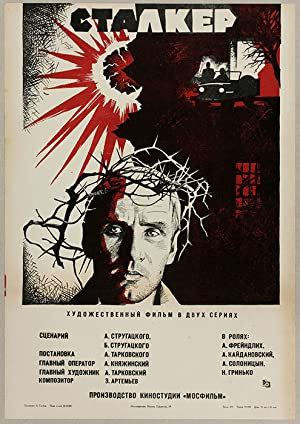

In [25]:
import requests
from PIL import Image

response = requests.get(results['poster'], stream=True)
Image.open(response.raw)

In [27]:
tb_top_movies = pd.read_csv('data/top_gross_ltv.csv', sep = ";", decimal = ",")

In [28]:
tb_top_movies

,movie_name,adj_gross_ltv
0,Gone with the Wind,1850581586
1,Star Wars: Episode IV - A New Hope,1629496559
2,The Sound of Music,1303502105
3,E.T. the Extra-Terrestrial,1297730421
4,Titanic,1240054754
...,...,...
195,Patton,364456792
196,Fatal Attraction,363012270
197,Iron Man 2,362898831
198,Zootopia,362329805


In [29]:
top_movies = list(tb_top_movies['movie_name'])
print(len(top_movies))
print(top_movies[0:5])

200
['Gone with the Wind', 'Star Wars: Episode IV - A New Hope', 'The Sound of Music', 'E.T. the Extra-Terrestrial', 'Titanic']


In [30]:
results = client.title(top_movies[0])

In [33]:
results

{'title': 'Gone with the Wind',
 'year': '1939',
 'rated': 'Passed',
 'released': '17 Jan 1940',
 'runtime': '238 min',
 'genre': 'Drama, History, Romance',
 'director': 'Victor Fleming, George Cukor, Sam Wood',
 'writer': 'Margaret Mitchell, Sidney Howard, Oliver H.P. Garrett',
 'actors': 'Clark Gable, Vivien Leigh, Thomas Mitchell',
 'plot': 'The manipulative daughter of a Georgia plantation owner conducts a turbulent romance with a roguish profiteer during the American Civil War and Reconstruction periods.',
 'language': 'English',
 'country': 'United States',
 'awards': 'Won 10 Oscars. 21 wins & 12 nominations total',
 'poster': 'https://m.media-amazon.com/images/M/MV5BYjUyZWZkM2UtMzYxYy00ZmQ3LWFmZTQtOGE2YjBkNjA3YWZlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg',
 'ratings': [{'source': 'Internet Movie Database', 'value': '8.1/10'},
  {'source': 'Rotten Tomatoes', 'value': '90%'},
  {'source': 'Metacritic', 'value': '97/100'}],
 'metascore': '97',
 'imdb_rating': '8.1',
 'imdb_votes':

In [34]:
dataframe_new = pd.DataFrame()

for i in range(100):
    results = client.title(top_movies[i])
    dataframe_aux = pd.DataFrame([results['title'] results['released'] results['ratings'][0] results['runtime']])
    dataframe_new = dataframe_new.append(dataframe_aux)

'238 min'

In [ ]:
# Criar um DataFrame com os dados abaixo para os 100 maiores:
# - NOME DO FILME (STRING)
# - ANO DE LANÇAMENTO (INTEGER)
# - NOTA NO IMDB (FLOAT)
# - NOTA NO ROTTEN TOMATOES (FLOAT)
# - DURAÇÃO EM MINUTOS (INTEGER)

## Spotify

Install spotipy: `pip install spotipy`

Read its documentation: https://spotipy.readthedocs.io/en/2.17.1/

If you read the documentation, it tells you to get your `access key` at https://developer.spotify.com/documentation/web-api/. You can view the `quick-start` tab or follow the guidelines here.

- Click on `Dashboard`
- Log in to your Spotify account
- Create an APP
- Collect your `Client ID` and `Client Secret` (click on SHOW CLIENT SECRET)
- Click on `Edit Settings` on your app's dashboard
    - You have to insert a `redirect_uri` (I've put: https://www.google.com. You can put anything.)
- Find your username ID in your profile settings.


- Code Samples: https://github.com/plamere/spotipy/tree/master/examples

In [35]:
!pip install spotipy

In [36]:
load_dotenv('credentials/key_spotify.env')

True

In [37]:
from spotipy import util, oauth2, Spotify

### Authentication 

In [38]:
client = Spotify(auth_manager=oauth2.SpotifyClientCredentials(
    client_id=os.getenv('CLIENT_ID'), client_secret=os.getenv('CLIENT_SECRET')))

In [39]:
client

### Get Audio Features

In [40]:
pd.DataFrame(client.audio_features(['https://open.spotify.com/track/4vy2YnIiU37OB7BonhYWgZ?si=c9f97bf9a6494803',
                                    'https://open.spotify.com/track/5P9qFmIiMqE6r2UfwVIdIZ?si=4b95ccef589d4924',
                                    'https://open.spotify.com/track/7oGwKNBX90dXL53ZbhPxJk?si=8bb44916119a413a',
                                    'https://open.spotify.com/track/3u4jdEDB2WmOBIxxpzq44f?si=471e5e610d8646f4']))

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.357,0.565,8,-9.915,0,0.0419,0.2160,0.835000,0.980,0.2180,158.032,audio_features,4vy2YnIiU37OB7BonhYWgZ,spotify:track:4vy2YnIiU37OB7BonhYWgZ,https://api.spotify.com/v1/tracks/4vy2YnIiU37O...,https://api.spotify.com/v1/audio-analysis/4vy2...,758360,4
1,0.624,0.597,0,-10.542,1,0.0490,0.0992,0.778000,0.108,0.0840,119.964,audio_features,5P9qFmIiMqE6r2UfwVIdIZ,spotify:track:5P9qFmIiMqE6r2UfwVIdIZ,https://api.spotify.com/v1/tracks/5P9qFmIiMqE6...,https://api.spotify.com/v1/audio-analysis/5P9q...,538320,4
2,0.377,0.402,5,-8.564,1,0.0295,0.5360,0.786000,0.117,0.0415,159.819,audio_features,7oGwKNBX90dXL53ZbhPxJk,spotify:track:7oGwKNBX90dXL53ZbhPxJk,https://api.spotify.com/v1/tracks/7oGwKNBX90dX...,https://api.spotify.com/v1/audio-analysis/7oGw...,257972,4
3,0.657,0.693,0,-7.149,0,0.0650,0.5270,0.000129,0.326,0.7500,93.483,audio_features,3u4jdEDB2WmOBIxxpzq44f,spotify:track:3u4jdEDB2WmOBIxxpzq44f,https://api.spotify.com/v1/tracks/3u4jdEDB2WmO...,https://api.spotify.com/v1/audio-analysis/3u4j...,262653,4


### Get top tracks given artist URI

In [41]:
artist = client.artist('6FXMGgJwohJLUSr5nVlf9X')

In [42]:
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6FXMGgJwohJLUSr5nVlf9X'},
 'followers': {'href': None, 'total': 1816552},
 'genres': ['big beat', 'downtempo', 'electronica', 'trip hop'],
 'href': 'https://api.spotify.com/v1/artists/6FXMGgJwohJLUSr5nVlf9X',
 'id': '6FXMGgJwohJLUSr5nVlf9X',
 'images': [{'height': 1335,
   'url': 'https://i.scdn.co/image/c8bbeedb05f38ae5cb982a7daf4bf7129cca892c',
   'width': 1000},
  {'height': 855,
   'url': 'https://i.scdn.co/image/52c2a824e84f4e8adf0b12418f9f8306b4b5b77a',
   'width': 640},
  {'height': 267,
   'url': 'https://i.scdn.co/image/0d6b7677f8291c5158bdace8a6e027880c527c2a',
   'width': 200},
  {'height': 85,
   'url': 'https://i.scdn.co/image/c055290bb6e97a589d8ca659cd452a8e9831c2c4',
   'width': 64}],
 'name': 'Massive Attack',
 'popularity': 67,
 'type': 'artist',
 'uri': 'spotify:artist:6FXMGgJwohJLUSr5nVlf9X'}

In [44]:
related_artists = client.artist_related_artists('6FXMGgJwohJLUSr5nVlf9X')

In [45]:
related_artists

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6hhA8TKRNryM8FNzqCqdDO'},
   'followers': {'href': None, 'total': 413979},
   'genres': ['art pop', 'big beat', 'electronica', 'nu jazz', 'trip hop'],
   'href': 'https://api.spotify.com/v1/artists/6hhA8TKRNryM8FNzqCqdDO',
   'id': '6hhA8TKRNryM8FNzqCqdDO',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab6761610000e5ebe9766b4ae86d12fec7d51379',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/ab67616100005174e9766b4ae86d12fec7d51379',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/ab6761610000f178e9766b4ae86d12fec7d51379',
     'width': 160}],
   'name': 'Tricky',
   'popularity': 57,
   'type': 'artist',
   'uri': 'spotify:artist:6hhA8TKRNryM8FNzqCqdDO'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/6liAMWkVf5LH7YR9yfFy1Y'},
   'followers': {'href': None, 'total': 1536148},
   'genres': ['electronica', 'laborator

In [ ]:
print(related_artists.keys())

In [ ]:
type(related_artists['artists'])

In [ ]:
related_artists['artists'][0]

In [ ]:
related_artists['artists'][0]['name']

In [ ]:
[artist['name'] for artist in related_artists['artists']]

In [ ]:
top_tracks = client.artist_top_tracks('6FXMGgJwohJLUSr5nVlf9X')
top_tracks

In [ ]:
top_tracks.keys()

In [ ]:
type(top_tracks['tracks'])

In [ ]:
top_tracks['tracks'][0]

In [ ]:
top_tracks['tracks'][0].keys()

In [ ]:
top_tracks['tracks'][0]['name']

In [ ]:
top_tracks['tracks'][0]['popularity']

In [ ]:
top_tracks['tracks'][0]['uri']

In [ ]:
pd.DataFrame(client.audio_features([top_tracks['tracks'][0]['uri']]))

In [51]:
# Extrair as audio features das 10 maiores faixas de cada artista na lista de clientes.
# - NOME CLIENTE (String)
# - NOME FAIXA (String) >> nome da música
# - POPULARIDADE ARTISTA (Integer)
# - POPULARIDADE FAIXA (Integer)
# - DANCEABILITY (Float)
# - ENERGY (Float)
# - TEMPO (Float)
# - DURAÇÃO em MINUTOS (Float)

# lista de clientes
lista_clientes = [
    '6kBDZFXuLrZgHnvmPu9NsG',
    '2VAvhf61GgLYmC6C8anyX1',
    '7AiamoV760pPGGM5PbOC6X'
]

# cada artista na lista de clientes
nome_cliente  = lista_clientes[0]
pd.DataFrame(client.artist_top_tracks(nome_cliente))

,tracks
0,"{'album': {'album_type': 'album', 'artists': [..."
1,"{'album': {'album_type': 'album', 'artists': [..."
2,"{'album': {'album_type': 'album', 'artists': [..."
3,"{'album': {'album_type': 'album', 'artists': [..."
4,"{'album': {'album_type': 'album', 'artists': [..."
5,"{'album': {'album_type': 'album', 'artists': [..."
6,"{'album': {'album_type': 'single', 'artists': ..."
7,"{'album': {'album_type': 'album', 'artists': [..."
8,"{'album': {'album_type': 'single', 'artists': ..."
9,"{'album': {'album_type': 'single', 'artists': ..."


In [ ]:
client.artist_top_tracks('6FXMGgJwohJLUSr5nVlf9X')